In [39]:
from datetime import datetime
import seaborn
from utils import *

DATA_PATH = "../Data/"

# Plot the media coverage vs frequency distribution of positive/negative quotes.

# Exploratory Analysis

## Read from CSV

In [40]:
sentiment_analysis_datapath = f"{DATA_PATH}preprocessed/"
MODEL = 'TextBlob'
COLUMNS = ['quotation_polarity', 'quotation_subjectivity']

df_obama_2012_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2012_obama_quotes_{MODEL}_processed.csv')
df_obama_2012_all_quotes.name = 'Obama_2012'
df_romney_2012_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2012_romney_quotes_{MODEL}_processed.csv')
df_romney_2012_all_quotes.name = 'Romney_2012'
df_trump_2016_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2016_trump_quotes_{MODEL}_processed.csv')
df_trump_2016_all_quotes.name = 'Trump_2016'
df_clinton_2016_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2016_clinton_quotes_{MODEL}_processed.csv')
df_clinton_2016_all_quotes.name = 'Clinton_2016'
df_trump_2020_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2020_trump_quotes_{MODEL}_processed.csv')
df_trump_2020_all_quotes.name = 'Trump_2020'
df_biden_2020_all_quotes = pd.read_csv(f'{sentiment_analysis_datapath}2020_biden_quotes_{MODEL}_processed.csv')
df_biden_2020_all_quotes.name = 'Biden_2020'

df_obama_2012_all_quotes.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,...,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized,quotation_polarity,quotation_subjectivity
0,0,1,1802,2012-02-28-019791,"he used to say, `what is it about working men ...",president obama,['Q76'],2012-02-28 18:15:46,4,"[['president obama', '0.5761'], ['None', '0.18...",...,C,Feb,NY Times,Barack Obama,"['', 'used', 'to', 'say', 'what', '', 'it', ''...","['', 'use', 'say', '', '', 'work', 'men', 'wom...","['', 'used', 'say', '', '', 'working', 'men', ...",used say working men woman find offensive,0.000000,0.000000
1,1,3,5156,2012-09-11-054851,"no matter how many years pass, no matter how m...",michelle obama,['Q13133'],2012-09-11 14:26:35,5,"[['michelle obama', '0.3999'], ['president oba...",...,C,Sep,NY Times,Barack Obama,"['no', 'matter', 'how', 'many', 'years', 'pass...","['matter', 'mani', 'year', 'pass', 'matter', '...","['matter', 'many', 'year', 'pas', 'matter', 'm...",matter many year pas matter many time come tog...,0.500000,0.500000
2,2,4,5275,2012-01-09-046115,"obviously, this was not easy news to hear,",president barack obama,['Q76'],2012-01-09 20:48:40,15,"[['president barack obama', '0.3927'], ['willi...",...,C,Jan,NY Times,Barack Obama,"['', 'this', 'was', 'not', 'easy', 'news', 'to...","['', 'easi', 'news', 'hear']","['', 'easy', 'news', 'hear']",easy news hear,0.433333,0.833333
3,3,6,5808,2012-04-03-059806,"see energy prices rise,",president obama,['Q76'],2012-04-03 03:43:25,4,"[['president obama', '0.4714'], ['None', '0.39...",...,C,Apr,NY Times,Barack Obama,"['see', 'energy', 'prices', 'rise']","['see', 'energi', 'price', 'rise']","['see', 'energy', 'price', 'rise']",see energy price rise,0.000000,0.000000
4,4,10,9600,2012-11-03-055227,"you do want to be able to trust your president,",president obama,['Q76'],2012-11-03 23:53:48,1,"[['president obama', '0.6007'], ['None', '0.39...",...,C,Nov,NY Times,Barack Obama,"['you', 'do', 'want', 'to', '', '', 'to', 'tru...","['want', '', '', 'trust', 'presid']","['want', '', '', 'trust', 'president']",want trust president,0.000000,0.000000


## Plot the frequency distributions of polarity and subjectivity

Let's look at the frequency distribution of the polarity and subjectivity computed from the quotes.

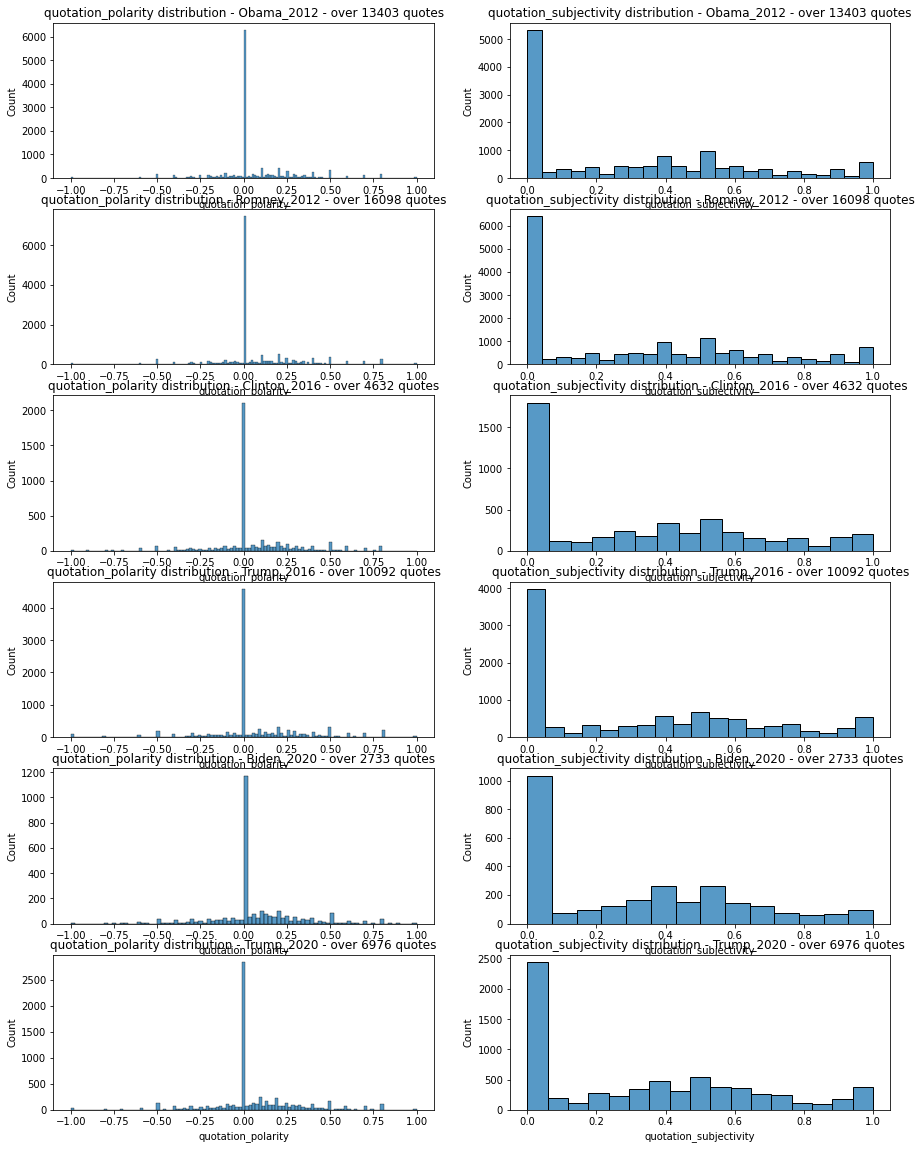

In [41]:
def plot_freq_distribution(array_of_candidate_with_all_quotes, columns):
    """
    Iterate over the array and plot the frequency distribution of the Series located at columns.
    :param array_of_candidate_with_all_quotes: array of dataframes with quotes of candidate.
    :param columns: name of columns of a dataframe to plot the values.
    """
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(6, 1 * len(columns), figsize=(15, 40 / len(columns)))

    for i, df_candidate_year_sa in enumerate(array_of_candidate_with_all_quotes):
        for j, column in enumerate(columns):
            if len(columns) > 1:
                seaborn.histplot(df_candidate_year_sa[column], ax=axes[i][j])
                axes[i][j].set_title(
                    f'{column} distribution - {df_candidate_year_sa.name} - over {len(df_candidate_year_sa)} quotes')
            else:
                seaborn.histplot(df_candidate_year_sa[column], ax=axes[i])
                axes[i].set_title(
                    f'{column} distribution - {df_candidate_year_sa.name} - over {len(df_candidate_year_sa)} quotes')


plot_freq_distribution(
    [df_obama_2012_all_quotes, df_romney_2012_all_quotes, df_clinton_2016_all_quotes, df_trump_2016_all_quotes,
     df_biden_2020_all_quotes, df_trump_2020_all_quotes],
    COLUMNS)

We observe that the majority of quotes are analyzed as neutral. This could be a bias of the dataset as well as our sentiment analysis bias. We figured that the choice of stopwords to be removed from the strings is crucial to attributing positive or negative values. When comparing different models, we should pay attention to that.

## Timeline of polarity and subjectivity distribution over 2016 and 2020 elections

Now let's plot the polarity and subjectivity distributions over time aggregated by month and candidate.

In [44]:
def df_groupy_polarity_by_months(df_candidates, subjectivity=False):
    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    # aggregate data over month and candidate
    groupyby_result = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).mean()[
        f'quotation_{metric}']

    # magic trick to convert to standard df
    st_df = pd.DataFrame(
        [[month, groupyby_result.at[month][candidate], candidate] for month, candidate in groupyby_result.index],
        columns=['month', f'quotation_{metric}', 'candidate'])
    return st_df.sort_values(ignore_index=True, by=['month'])

In [45]:
df_obama_romney_2012 = pd.concat([df_obama_2012_all_quotes, df_romney_2012_all_quotes], ignore_index=True)
df_trump_clinton_2016 = pd.concat([df_trump_2016_all_quotes, df_clinton_2016_all_quotes], ignore_index=True)
df_trump_biden_2020 = pd.concat([df_trump_2020_all_quotes, df_biden_2020_all_quotes], ignore_index=True)

# The quotes are aggregated and averaged by month and by candidate
df_2012_polarity_grouped_by_month = df_groupy_polarity_by_months(df_obama_romney_2012)
df_2016_polarity_grouped_by_month = df_groupy_polarity_by_months(df_trump_clinton_2016)
df_2020_polarity_grouped_by_month = df_groupy_polarity_by_months(df_trump_biden_2020)
df_2012_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2012'
df_2016_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2016'
df_2020_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2020'

if MODEL == 'TextBlob':
    df_2012_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_obama_romney_2012, subjectivity=True)
    df_2016_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_trump_clinton_2016, subjectivity=True)
    df_2020_subjectivity_grouped_by_month = df_groupy_polarity_by_months(df_trump_biden_2020, subjectivity=True)
    df_2012_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2012'
    df_2016_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2016'
    df_2020_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2020'

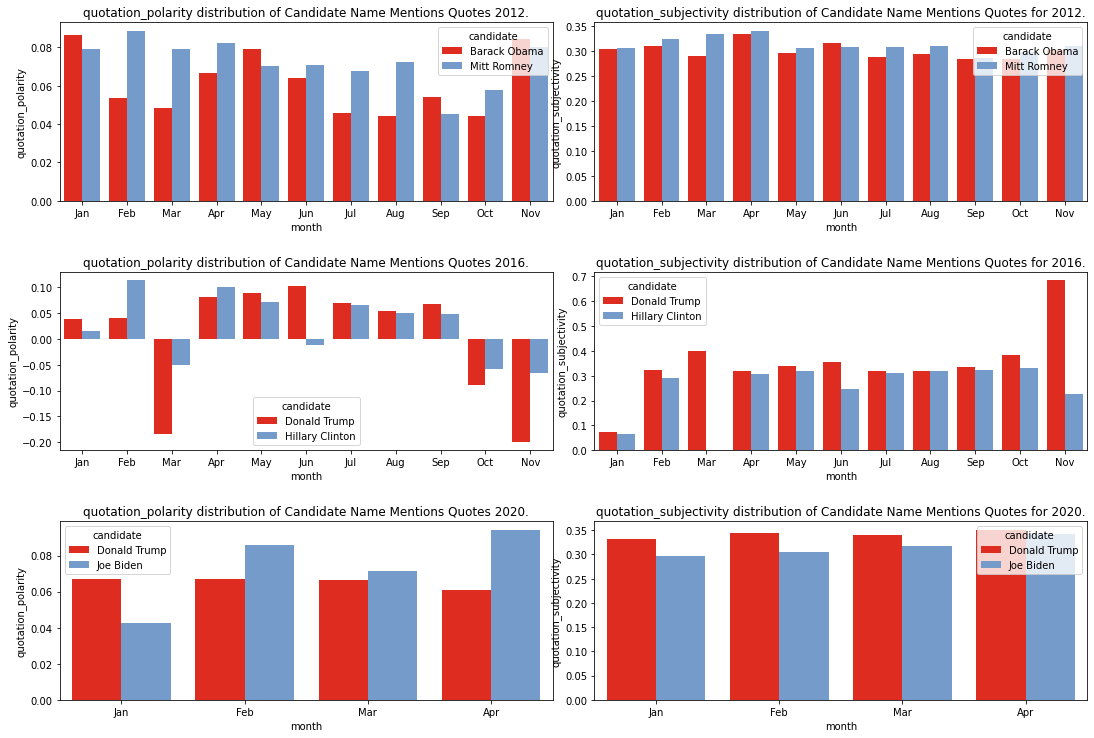

In [46]:
def plot_time_distribution(array_of_grouped_by_month, months, columns):
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(3, 1 * len(columns), figsize=(15, 20 / len(columns)))
    fig.tight_layout(h_pad=5)

    for j, column in enumerate(columns):
        df_candidates_of_year = array_of_grouped_by_month[j]
        for i, candidate_of_year in enumerate(df_candidates_of_year):
            if len(columns) > 1:
                axes[i][j].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='month', y=column, data=candidate_of_year,
                                hue="candidate",
                                order=months[i + 1 // 2], ax=axes[i][j], palette=["#fe1100", '#6699d8'])
            else:
                axes[i].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='month', y=column, data=candidate_of_year,
                                hue="candidate",
                                order=months[i + 1 // 2], ax=axes[i], palette=["#fe1100", '#6699d8'])


months_2012 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2016 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr']

if MODEL == 'TextBlob':
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month],
              [df_2012_subjectivity_grouped_by_month, df_2016_subjectivity_grouped_by_month,
               df_2020_subjectivity_grouped_by_month]]
else:
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month]]

plot_time_distribution(concat, months=[months_2012, months_2016, months_2020],
                       columns=COLUMNS)

Unfortunately, the change in polarity (y-axis) from a month to another is very small in most cases which makes it difficult conclude a meaningful statistical change. However we observe a very different timeline for 2016 election.

Finally, the quotes from 2020 don't extend past April.

We now plot the same distribution grouped by weeks, for a more fine-grained visualisation

In [47]:
def df_groupy_polarity_by_week(df_candidates, subjectivity=False):
    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    df_candidates['week'] = df_candidates['date'].apply(
        lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").isocalendar()[1])

    # aggregate data over month and candidate
    groupby_result = df_candidates[['week', f'quotation_{metric}']].groupby([df_candidates.week, df_candidates.candidate]).mean()[
        f'quotation_{metric}']

    # magic trick to convert to standard df
    groupby_result = pd.DataFrame(
        [[week, groupby_result.at[week][candidate], candidate] for week, candidate in groupby_result.index],
        columns=['week', f'quotation_{metric}', 'candidate'])
    return groupby_result

In [48]:
df_obama_romney_2012 = pd.concat([df_obama_2012_all_quotes, df_romney_2012_all_quotes], ignore_index=True)
df_trump_clinton_2016 = pd.concat([df_trump_2016_all_quotes, df_clinton_2016_all_quotes], ignore_index=True)
df_trump_biden_2020 = pd.concat([df_trump_2020_all_quotes, df_biden_2020_all_quotes], ignore_index=True)

# The quotes are aggregated and averaged by week and by candidate
df_2012_polarity_grouped_by_month = df_groupy_polarity_by_week(df_obama_romney_2012)
df_2016_polarity_grouped_by_month = df_groupy_polarity_by_week(df_trump_clinton_2016)
df_2020_polarity_grouped_by_month = df_groupy_polarity_by_week(df_trump_biden_2020)
df_2012_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2012'
df_2016_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2016'
df_2020_polarity_grouped_by_month.name = 'Candidate Name Mentions Quotes 2020'

if MODEL == 'TextBlob':
    df_2012_subjectivity_grouped_by_month = df_groupy_polarity_by_week(df_obama_romney_2012, subjectivity=True)
    df_2016_subjectivity_grouped_by_month = df_groupy_polarity_by_week(df_trump_clinton_2016, subjectivity=True)
    df_2020_subjectivity_grouped_by_month = df_groupy_polarity_by_week(df_trump_biden_2020, subjectivity=True)
    df_2012_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2012'
    df_2016_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2016'
    df_2020_subjectivity_grouped_by_month.name = 'Candidate Name Mentions Quotes for 2020'

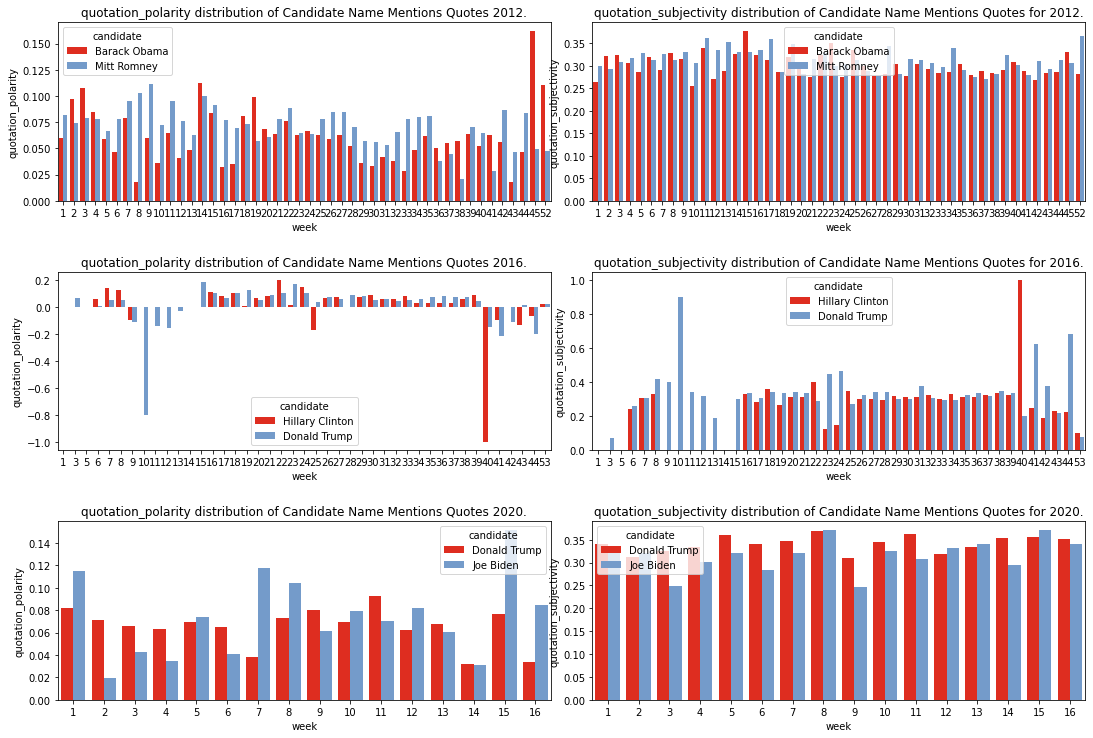

In [49]:
def display_distribution_over_weeks(df_candidates_of_year_arr, columns):
    if 0 == len(columns) > 2:
        raise KeyError('columns should be length 1 or 2')

    fig, axes = plt.subplots(3, 1 * len(columns), figsize=(15, 20 / len(columns)))
    fig.tight_layout(h_pad=5)

    for j, column in enumerate(columns):
        df_candidates_of_year = df_candidates_of_year_arr[j]
        for i, candidate_of_year in enumerate(df_candidates_of_year):
            if len(columns) > 1:
                axes[i][j].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='week', y=column, data=candidate_of_year,
                                hue="candidate", ax=axes[i][j], palette=["#fe1100", '#6699d8'])
            else:
                axes[i].set_title(f"{column} distribution of {candidate_of_year.name}.")
                seaborn.barplot(x='week', y=column, data=candidate_of_year,
                                hue="candidate", ax=axes[i], palette=["#fe1100", '#6699d8'])


if MODEL == 'TextBlob':
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month],
              [df_2012_subjectivity_grouped_by_month, df_2016_subjectivity_grouped_by_month,
               df_2020_subjectivity_grouped_by_month]]
else:
    concat = [[df_2012_polarity_grouped_by_month, df_2016_polarity_grouped_by_month,
               df_2020_polarity_grouped_by_month]]

display_distribution_over_weeks(concat, columns=COLUMNS)

## Wordcloud of positive and negative quotes (80% threshold)

A simple way to visualise assess the correctness of our sentiment analysis is to plot the word cloud related to the most positive or negatives quotes (>80%). We can visually see if the most present words have indeed a positive/negative connotation.

In [50]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_word_cloud(type_, string: str, filter_keywords=[]):
    for keyword in filter_keywords:
        string = string.replace(keyword, '')

    string_split = Counter(string.split(' '))
    counts = {k: v for k, v in string_split.most_common(200)}

    fig = plt.figure(figsize=(15, 15))
    plt.title('word cloud ' + type_, fontsize=30, pad=25)
    wordcloud = WordCloud(background_color="white", contour_width=3,
                          contour_color='steelblue').generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [51]:
def extract_positive_sentiment(df_quotes, threshold=0.5):
    ada_threshold = df_quotes['quotation_polarity'].quantile(q=threshold)
    print(f'ada threshold {ada_threshold}')
    positive_quotes = df_quotes[df_quotes['quotation_polarity'] > ada_threshold]
    return positive_quotes


def extract_negative_sentiment(df_quotes, threshold=0.5):
    ada_threshold = df_quotes['quotation_polarity'].quantile(q=1 - threshold)
    print(f'ada threshold {ada_threshold}')
    negative_quotes = df_quotes[df_quotes['quotation_polarity'] < ada_threshold]
    return negative_quotes

ada threshold 0.5
ada threshold -0.3125


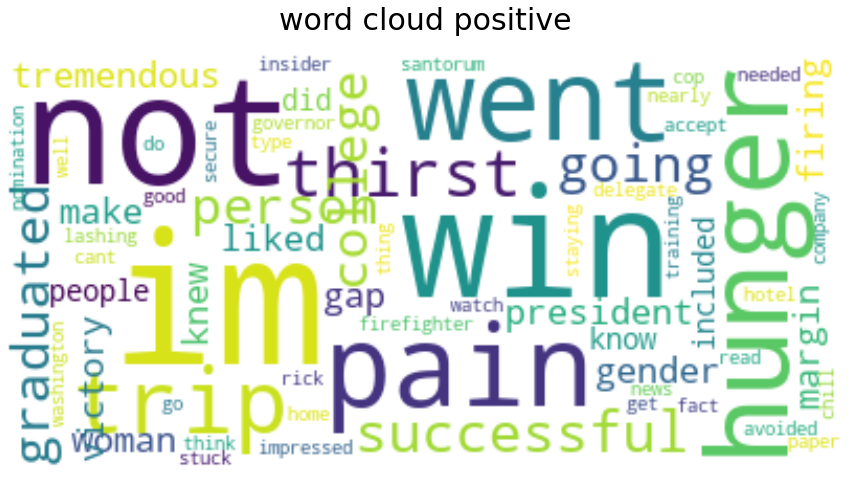

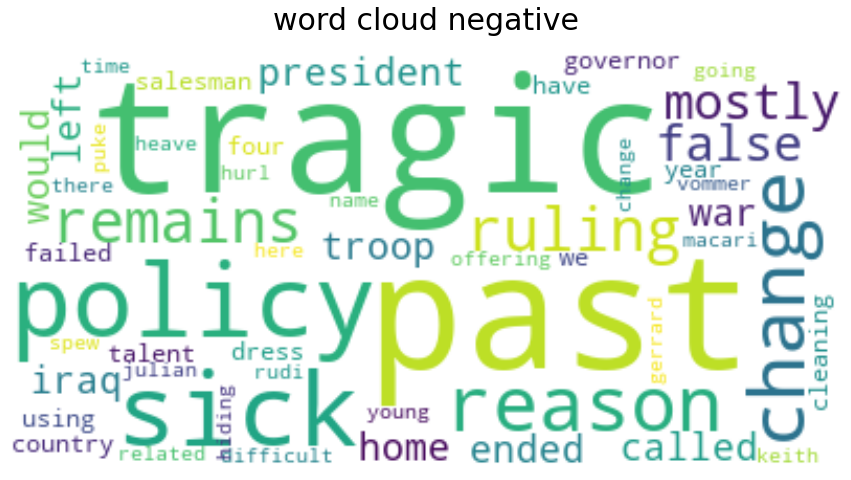

In [52]:
# filter quotes with only positive polarity (>0.8) which corresponds to a higher confidence in prediction.
positive_pol_quotes = extract_positive_sentiment(df_obama_romney_2012, threshold=0.95)
negative_pol_quotes = extract_negative_sentiment(df_obama_romney_2012, threshold=0.95)

positive_long_string = remove_punct(''.join(str(positive_pol_quotes['quotation_conc_lemmatized'].values)))

negative_long_string = remove_punct(''.join(str(negative_pol_quotes['quotation_conc_lemmatized'].values)))

plot_word_cloud('positive', positive_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])
plot_word_cloud('negative', negative_long_string, filter_keywords=['mitt', 'romney', 'barack', 'obama'])

Our initial baseline sentiment analysis implementation seems to be working properly i.e the most positive/negative quoted words have positive/negative meaning. Furthermore, We need a golden standard to compute the true accuracy.